In [1]:
import pandas as pd
import missingno as msno
from numpy.core.multiarray import result_type
import numpy as np



In [2]:
# Read the data
#iex_2015 = pd.read_csv('/home/freitas/Downloads/internet2/data/IDEGES_2016.csv',decimal=',', sep='|', encoding='latin-1')
#print(iex_2015.columns)
#iex_2015

In [3]:
# read tha data in many file and merge it in one dictionary
filemainpath = "/home/freitas/Downloads/internet2/data/"
keep = ['CNPJ','AN_EXERCICIO','IEX']
df = {}
# for year in range(2015, 2020):
#     filename = f'iex_inep_{year}.CSV'
#     df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, sep=',', encoding='latin1')
#     df['iex_'+str(year)] = df['iex_'+str(year)][keep]
#     df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
#     df['iex'+str(year)] = df['iex_'+str(year)].dropna()
#     df['iex'+str(year)] = df['iex'+str(year)].drop_duplicates()
#     print({year},df['iex_'+str(year)].shape)
# for year in range(2020,2022):
#     filename = f'iex_inep_{year}.CSV'
#     df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, sep=';', encoding='latin1')
#     df['iex_'+str(year)] = df['iex_'+str(year)][keep]
#     df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
#     print({year},df['iex_'+str(year)].shape)
for year in range(2020, 2022):
    filename = f'IDEGES_{year}.csv'
    df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, decimal=',', sep='|', encoding='latin-1')
    df['iex_'+str(year)] = df['iex_'+str(year)][keep]
    df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
    df['iex_'+str(year)] = df['iex_'+str(year)].dropna()
    df['iex_'+str(year)] = df['iex_'+str(year)].drop_duplicates()
    print({year},df['iex_'+str(year)].shape)
# for year in range(2020,2022):
#     filename = f'iex_inep_{year}.CSV'
#     df['iex_'+str(year)] = pd.read_csv(filemainpath + filename, sep=';', encoding='latin1')
#     df['iex_'+str(year)] = df['iex_'+str(year)][keep]
#     df['iex_'+str(year)].rename(columns={'AN_EXERCICIO':'ANO'}, inplace=True)
#     print({year},df['iex_'+str(year)].shape)


{2020} (134232, 3)
{2021} (135977, 3)


In [4]:
print(df.keys())
# merge all dataframes in the dictionary into one dataframe
df = pd.concat(df.values(), ignore_index=True)


dict_keys(['iex_2020', 'iex_2021'])


In [5]:
# read data
#df = pd.read_csv('/home/freitas/Downloads/internet2/data/IEx_2014_2020.csv',sep=';')
df

,CNPJ,ANO,IEX
0,4033254000167,2020,0.170896
1,4045993000179,2020,5.115246
2,4508933000145,2020,0.000000
3,4012548000102,2020,0.000000
4,4005179000120,2020,0.000000
...,...,...,...
270204,18382268000109,2021,9.785132
270205,18382330000154,2021,9.889496
270206,17964207000189,2021,9.939361
270207,21249243000138,2021,10.000000


In [6]:
df.dtypes

CNPJ      int64
ANO       int64
IEX     float64
dtype: object

In [12]:
# convert CNPJ to float
#df['CNPJ']=df['CNPJ'].astype(int)
#df.dtypes

CNPJ      int64
ANO       int64
IEX     float64
dtype: object

In [7]:
df.describe()

,CNPJ,ANO,IEX
count,2.702090e+05,270209.000000,270209.000000
mean,1.649052e+13,2020.503229,4.767025
std,2.254791e+13,0.499990,4.176838
min,0.000000e+00,2020.000000,0.000000
25%,2.534315e+12,2020.000000,0.000000
50%,7.550995e+12,2021.000000,4.890661
75%,1.887718e+13,2021.000000,9.602472
max,9.900000e+13,2021.000000,10.000000


In [8]:
df.sort_values(by=['IEX'],ascending=False).head(20)

,CNPJ,ANO,IEX
115636,95790010000184,2020,10.0
41662,7513316000126,2020,10.0
182173,80759756000158,2021,10.0
211463,1446865000149,2021,10.0
263409,2306900000197,2021,10.0
110636,49170178000170,2020,10.0
52437,11066343000175,2020,10.0
103960,67973859000158,2020,10.0
182145,80509821000197,2021,10.0
103971,10348470000102,2020,10.0


In [9]:
#drop lines with iex < 0 and iex > 10
df.query('IEX >= 0 and IEX <= 10', inplace=True)
df.describe()


,CNPJ,ANO,IEX
count,2.702090e+05,270209.000000,270209.000000
mean,1.649052e+13,2020.503229,4.767025
std,2.254791e+13,0.499990,4.176838
min,0.000000e+00,2020.000000,0.000000
25%,2.534315e+12,2020.000000,0.000000
50%,7.550995e+12,2021.000000,4.890661
75%,1.887718e+13,2021.000000,9.602472
max,9.900000e+13,2021.000000,10.000000


In [10]:
escola = pd.read_csv('/home/freitas/Downloads/internet2/data/Chave_escolas_censo.csv')
escola = escola[['CO_ESCOLA','NU_CGC_ENTIDADE']]
escola.rename(columns={'NU_CGC_ENTIDADE':'CNPJ'},inplace=True)
escola.dtypes

CO_ESCOLA    int64
CNPJ         int64
dtype: object

In [11]:
merge_iex_escola = pd.merge(df, escola, on='CNPJ', how='left')
merge_iex_escola.dropna(inplace=True)
merge_iex_escola['CO_ESCOLA'] = merge_iex_escola['CO_ESCOLA'].astype(int)
merge_iex_escola

,CNPJ,ANO,IEX,CO_ESCOLA
0,4033254000167,2020,0.170896,12004898
1,4033254000167,2020,0.170896,12022373
2,4033254000167,2020,0.170896,12031356
3,4033254000167,2020,0.170896,12027480
4,4033254000167,2020,0.170896,12028819
...,...,...,...,...
300962,18382268000109,2021,9.785132,43004040
300963,18382330000154,2021,9.889496,43004555
300964,17964207000189,2021,9.939361,43201954
300965,21249243000138,2021,10.000000,43314074


In [12]:
merge_iex_escola.isna().sum()
merge_iex_escola.dropna(inplace=True)
print(merge_iex_escola.shape)
merge_iex_escola.head()

(255888, 4)


,CNPJ,ANO,IEX,CO_ESCOLA
0,4033254000167,2020,0.170896,12004898
1,4033254000167,2020,0.170896,12022373
2,4033254000167,2020,0.170896,12031356
3,4033254000167,2020,0.170896,12027480
4,4033254000167,2020,0.170896,12028819


In [15]:
censo = pd.read_csv('/home/freitas/Downloads/internet2/data/censo_2014_2021.csv')
# rename columns CO_ENTIDADE to CO_ESCOLA
censo.rename(columns={'NU_ANO_CENSO':'ANO','CO_ENTIDADE':'CO_ESCOLA'},inplace=True)
censo.query('ANO > 2019', inplace=True)
print(censo.shape)
censo.tail()

(276923, 28)


,ANO,SG_UF,CO_ESCOLA,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,IN_PREDIO_COMPARTILHADO,IN_AGUA_REDE_PUBLICA,...,IN_QUADRA_ESPORTES,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA
1146421,2021,DF,53068190,5300108,1,2,1,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146422,2021,DF,53068203,5300108,1,2,1,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146423,2021,DF,53068211,5300108,1,2,1,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146424,2021,DF,53068220,5300108,1,2,1,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1146425,2021,DF,53068238,5300108,1,2,1,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [16]:
merge_iex_censo = pd.merge(merge_iex_escola, censo, on=['ANO','CO_ESCOLA'], how='inner')
print(merge_iex_censo.shape)
merge_iex_censo.tail()


(252278, 30)


,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_QUADRA_ESPORTES,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA
252273,18382268000109,2021,9.785132,43004040,RS,4322400,1,3,1,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
252274,18382330000154,2021,9.889496,43004555,RS,4302154,1,3,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
252275,17964207000189,2021,9.939361,43201954,RS,4318481,1,3,1,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
252276,21249243000138,2021,10.000000,43314074,RS,4314423,1,3,2,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
252277,20901206000108,2021,8.985692,43007260,RS,4303400,1,3,1,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [17]:
merge_iex_censo.isna().sum()

CNPJ                              0
ANO                               0
IEX                               0
CO_ESCOLA                         0
SG_UF                             0
CO_MUNICIPIO                      0
TP_SITUACAO_FUNCIONAMENTO         0
TP_DEPENDENCIA                    0
TP_LOCALIZACAO                    0
IN_LOCAL_FUNC_GALPAO              0
IN_PREDIO_COMPARTILHADO        5378
IN_AGUA_REDE_PUBLICA              0
IN_ENERGIA_REDE_PUBLICA           0
IN_LIXO_SERVICO_COLETA            0
IN_ALMOXARIFADO                   0
IN_AUDITORIO                      0
IN_BIBLIOTECA                     0
IN_BIBLIOTECA_SALA_LEITURA        0
IN_LABORATORIO_CIENCIAS           0
IN_LABORATORIO_INFORMATICA        0
IN_QUADRA_ESPORTES                0
IN_SALA_DIRETORIA                 0
IN_SECRETARIA                     0
IN_COMPUTADOR                     0
IN_EQUIP_COPIADORA                0
IN_EQUIP_IMPRESSORA               0
IN_INTERNET                       0
IN_BANDA_LARGA              

In [19]:
banco = pd.read_csv('/home/freitas/Downloads/internet2/data/ag_demo_2014_2020.csv',sep=';',encoding='latin1')
banco2021 = pd.read_csv('/home/freitas/Downloads/internet2/data/ag_demo_2021.csv',sep=';',encoding='latin1')
banco = pd.concat([banco,banco2021],ignore_index=True)
banco.rename(columns={'ano':'ANO','CodMun':"CO_MUNICIPIO","POP.EST":"POP"},inplace=True)
banco = banco[['ANO','CO_MUNICIPIO','possui_agencia_BB','POP']]
print(banco.shape)
banco.query('ANO > 2019', inplace=True)
banco


(44560, 4)


,ANO,CO_MUNICIPIO,possui_agencia_BB,POP
33420,2020,1100015,1,22728
33421,2020,1100023,1,109523
33422,2020,1100031,0,5188
33423,2020,1100049,1,85893
33424,2020,1100056,1,16204
...,...,...,...,...
44555,2021,5222005,1,13977
44556,2021,5222054,1,8873
44557,2021,5222203,0,6312
44558,2021,5222302,0,5882


In [20]:
merge_iex_censo_banco = pd.merge(merge_iex_censo, banco, on = ['ANO','CO_MUNICIPIO'], how='left')
print(merge_iex_censo_banco.shape)
merge_iex_censo_banco.head()

(252278, 32)


,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_BANDA_LARGA,IN_REGULAR,IN_EJA,possui_agencia_BB,POP
0,4033254000167,2020,0.170896,12004898,AC,1200302,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1,34884
1,4033254000167,2020,0.170896,12022373,AC,1200302,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1,34884
2,4033254000167,2020,0.170896,12031356,AC,1200336,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1,19311
3,4033254000167,2020,0.170896,12027480,AC,1200401,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1,413418
4,4033254000167,2020,0.170896,12028819,AC,1200401,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1,413418


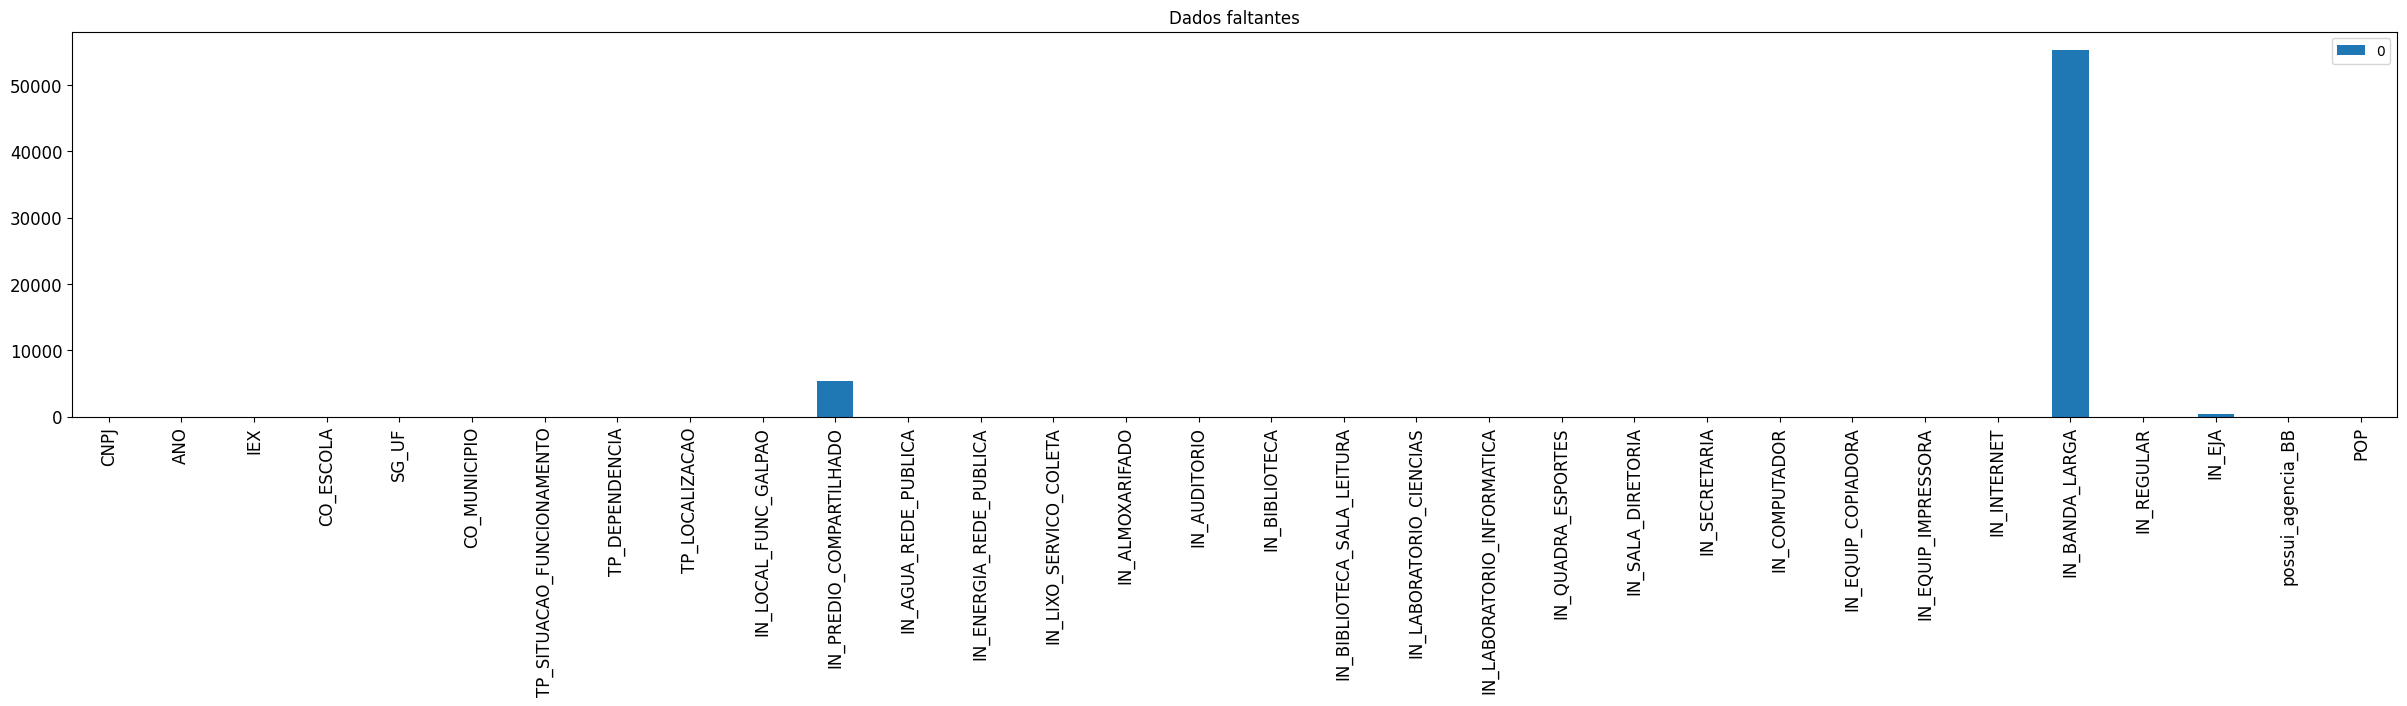

In [21]:
pd.DataFrame(merge_iex_censo_banco.isnull().sum()).plot(kind='bar',title='Dados faltantes',fontsize=12,figsize=(30,5));

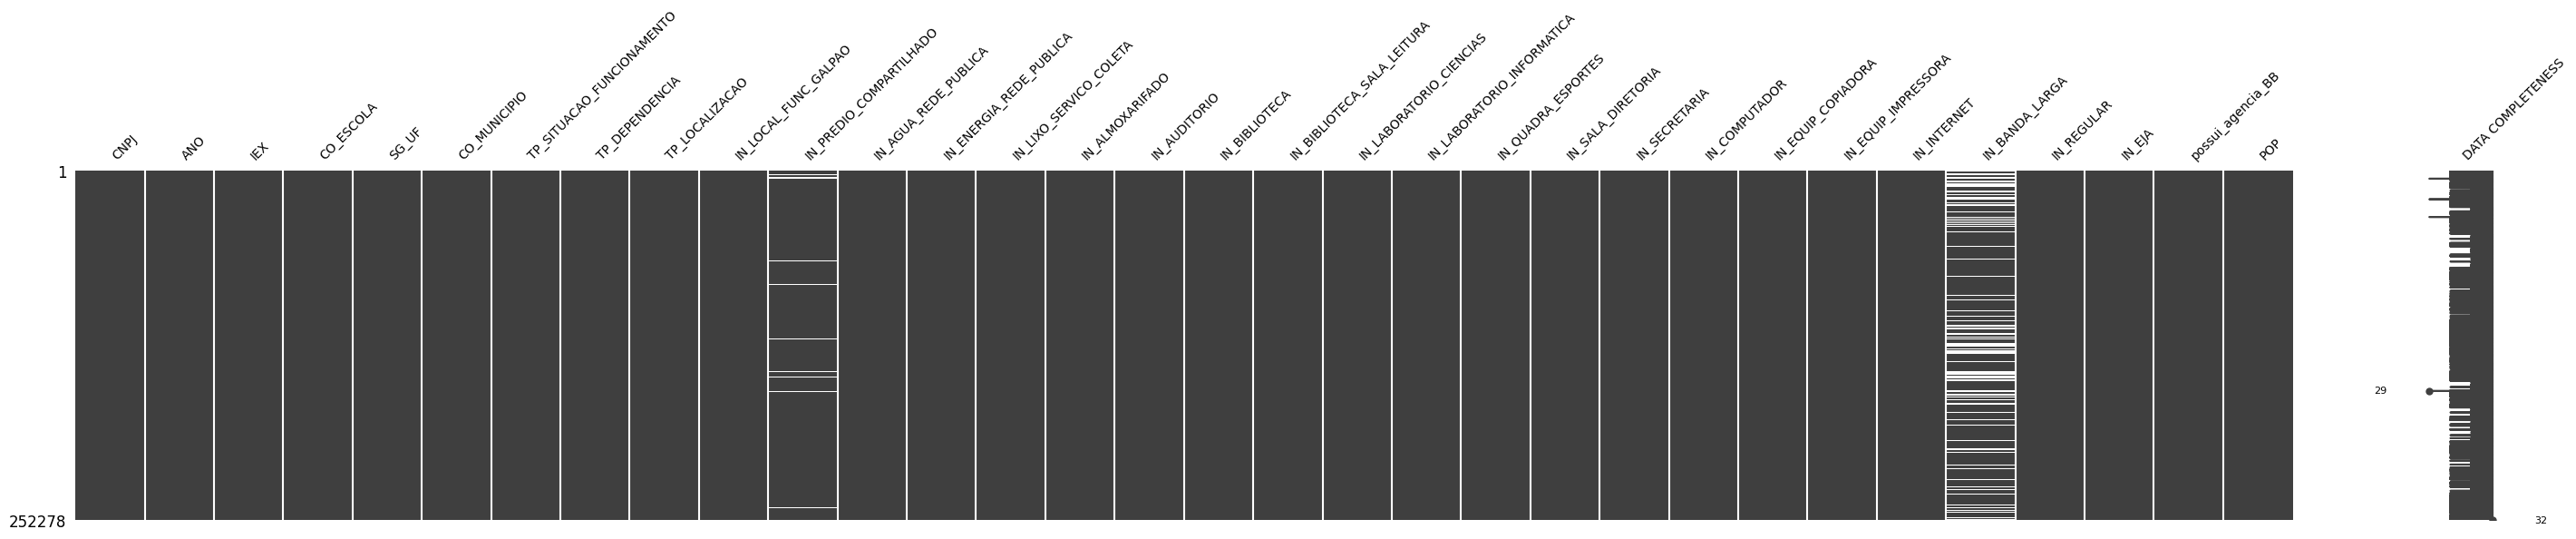

In [22]:
msno.matrix(merge_iex_censo_banco,labels=True,fontsize=10,figsize=(35,5));

In [23]:
merge_iex_censo_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252278 entries, 0 to 252277
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CNPJ                        252278 non-null  int64  
 1   ANO                         252278 non-null  int64  
 2   IEX                         252278 non-null  float64
 3   CO_ESCOLA                   252278 non-null  int64  
 4   SG_UF                       252278 non-null  object 
 5   CO_MUNICIPIO                252278 non-null  int64  
 6   TP_SITUACAO_FUNCIONAMENTO   252278 non-null  int64  
 7   TP_DEPENDENCIA              252278 non-null  int64  
 8   TP_LOCALIZACAO              252278 non-null  int64  
 9   IN_LOCAL_FUNC_GALPAO        252278 non-null  float64
 10  IN_PREDIO_COMPARTILHADO     246900 non-null  float64
 11  IN_AGUA_REDE_PUBLICA        252278 non-null  float64
 12  IN_ENERGIA_REDE_PUBLICA     252278 non-null  float64
 13  IN_LIXO_SERVIC

In [24]:
merge_iex_censo_banco.isna().sum()[20:40]

IN_QUADRA_ESPORTES         0
IN_SALA_DIRETORIA          0
IN_SECRETARIA              0
IN_COMPUTADOR              0
IN_EQUIP_COPIADORA         0
IN_EQUIP_IMPRESSORA        0
IN_INTERNET                0
IN_BANDA_LARGA         55306
IN_REGULAR                 0
IN_EJA                   354
possui_agencia_BB          0
POP                        0
dtype: int64

In [25]:
merge_iex_censo_banco.drop(columns='IN_BANDA_LARGA',inplace=True)

In [26]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer1.fit(merge_iex_censo_banco[['IN_PREDIO_COMPARTILHADO']])
merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = imputer1.transform(merge_iex_censo_banco[['IN_PREDIO_COMPARTILHADO']])
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer2.fit(merge_iex_censo_banco[['IN_EJA']])
merge_iex_censo_banco['IN_EJA'] = imputer2.transform(merge_iex_censo_banco[['IN_EJA']])



# merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].fillna(pd.NA)
# merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].fillna(pd.NA)
# merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].fillna(pd.NA)

# merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].fillna(2)
# merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].fillna(2)
# merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].fillna(2)
# merge_iex_censo_banco['IN_BANDA_LARGA'] = merge_iex_censo_banco['IN_BANDA_LARGA'].replace(2,pd.NA)  
# merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'] = merge_iex_censo_banco['IN_PREDIO_COMPARTILHADO'].replace(2,pd.NA)
# merge_iex_censo_banco['IN_EJA'] = merge_iex_censo_banco['IN_EJA'].replace(2,pd.NA)




In [27]:
merge_iex_censo_banco.dtypes

CNPJ                            int64
ANO                             int64
IEX                           float64
CO_ESCOLA                       int64
SG_UF                          object
CO_MUNICIPIO                    int64
TP_SITUACAO_FUNCIONAMENTO       int64
TP_DEPENDENCIA                  int64
TP_LOCALIZACAO                  int64
IN_LOCAL_FUNC_GALPAO          float64
IN_PREDIO_COMPARTILHADO       float64
IN_AGUA_REDE_PUBLICA          float64
IN_ENERGIA_REDE_PUBLICA       float64
IN_LIXO_SERVICO_COLETA        float64
IN_ALMOXARIFADO               float64
IN_AUDITORIO                  float64
IN_BIBLIOTECA                 float64
IN_BIBLIOTECA_SALA_LEITURA    float64
IN_LABORATORIO_CIENCIAS       float64
IN_LABORATORIO_INFORMATICA    float64
IN_QUADRA_ESPORTES            float64
IN_SALA_DIRETORIA             float64
IN_SECRETARIA                 float64
IN_COMPUTADOR                 float64
IN_EQUIP_COPIADORA            float64
IN_EQUIP_IMPRESSORA           float64
IN_INTERNET 

In [28]:
varlist = merge_iex_censo_banco.columns[9:-2] 
# varlist =['IN_LOCAL_FUNC_GALPAO',
#        'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA',
#        'IN_LIXO_SERVICO_COLETA', 'IN_ALMOXARIFADO', 'IN_AUDITORIO',
#        'IN_BIBLIOTECA', 'IN_BIBLIOTECA_SALA_LEITURA',
#        'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
#        'IN_QUADRA_ESPORTES', 'IN_SALA_DIRETORIA', 'IN_SECRETARIA',
#        'IN_COMPUTADOR', 'IN_EQUIP_COPIADORA', 'IN_EQUIP_IMPRESSORA',
#        'IN_INTERNET', 'IN_REGULAR'],
for var in varlist:
    merge_iex_censo_banco[var] = merge_iex_censo_banco[var].astype(int)

In [29]:
merge_iex_censo_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252278 entries, 0 to 252277
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CNPJ                        252278 non-null  int64  
 1   ANO                         252278 non-null  int64  
 2   IEX                         252278 non-null  float64
 3   CO_ESCOLA                   252278 non-null  int64  
 4   SG_UF                       252278 non-null  object 
 5   CO_MUNICIPIO                252278 non-null  int64  
 6   TP_SITUACAO_FUNCIONAMENTO   252278 non-null  int64  
 7   TP_DEPENDENCIA              252278 non-null  int64  
 8   TP_LOCALIZACAO              252278 non-null  int64  
 9   IN_LOCAL_FUNC_GALPAO        252278 non-null  int64  
 10  IN_PREDIO_COMPARTILHADO     252278 non-null  int64  
 11  IN_AGUA_REDE_PUBLICA        252278 non-null  int64  
 12  IN_ENERGIA_REDE_PUBLICA     252278 non-null  int64  
 13  IN_LIXO_SERVIC

In [30]:
merge_iex_censo_banco

,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_REGULAR,IN_EJA,possui_agencia_BB,POP
0,4033254000167,2020,0.170896,12004898,AC,1200302,1,2,2,0,...,0,0,0,0,0,0,1,0,1,34884
1,4033254000167,2020,0.170896,12022373,AC,1200302,1,2,2,0,...,0,0,0,0,0,0,1,0,1,34884
2,4033254000167,2020,0.170896,12031356,AC,1200336,1,2,2,0,...,0,0,0,0,0,0,1,0,1,19311
3,4033254000167,2020,0.170896,12027480,AC,1200401,1,2,2,0,...,0,0,0,0,0,0,1,0,1,413418
4,4033254000167,2020,0.170896,12028819,AC,1200401,1,2,2,0,...,0,0,0,0,0,0,1,0,1,413418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252273,18382268000109,2021,9.785132,43004040,RS,4322400,1,3,1,0,...,1,1,1,1,1,1,1,0,1,126866
252274,18382330000154,2021,9.889496,43004555,RS,4302154,1,3,1,0,...,1,0,1,0,0,1,1,0,0,2092
252275,17964207000189,2021,9.939361,43201954,RS,4318481,1,3,1,0,...,1,1,1,1,1,1,1,0,0,4865
252276,21249243000138,2021,10.000000,43314074,RS,4314423,1,3,2,0,...,1,1,1,0,0,1,1,0,0,5738


In [31]:
merge_iex_censo_banco.drop_duplicates(inplace=True)
merge_iex_censo_banco

,CNPJ,ANO,IEX,CO_ESCOLA,SG_UF,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,...,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_REGULAR,IN_EJA,possui_agencia_BB,POP
0,4033254000167,2020,0.170896,12004898,AC,1200302,1,2,2,0,...,0,0,0,0,0,0,1,0,1,34884
1,4033254000167,2020,0.170896,12022373,AC,1200302,1,2,2,0,...,0,0,0,0,0,0,1,0,1,34884
2,4033254000167,2020,0.170896,12031356,AC,1200336,1,2,2,0,...,0,0,0,0,0,0,1,0,1,19311
3,4033254000167,2020,0.170896,12027480,AC,1200401,1,2,2,0,...,0,0,0,0,0,0,1,0,1,413418
4,4033254000167,2020,0.170896,12028819,AC,1200401,1,2,2,0,...,0,0,0,0,0,0,1,0,1,413418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252273,18382268000109,2021,9.785132,43004040,RS,4322400,1,3,1,0,...,1,1,1,1,1,1,1,0,1,126866
252274,18382330000154,2021,9.889496,43004555,RS,4302154,1,3,1,0,...,1,0,1,0,0,1,1,0,0,2092
252275,17964207000189,2021,9.939361,43201954,RS,4318481,1,3,1,0,...,1,1,1,1,1,1,1,0,0,4865
252276,21249243000138,2021,10.000000,43314074,RS,4314423,1,3,2,0,...,1,1,1,0,0,1,1,0,0,5738


In [32]:
merge_iex_censo_banco.to_csv('/home/freitas/Downloads/internet2/data/merge_iex_censo_banco2020-2021.csv')

In [33]:
merge_iex_censo_banco.describe()

,CNPJ,ANO,IEX,CO_ESCOLA,CO_MUNICIPIO,TP_SITUACAO_FUNCIONAMENTO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_LOCAL_FUNC_GALPAO,IN_PREDIO_COMPARTILHADO,...,IN_SALA_DIRETORIA,IN_SECRETARIA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_INTERNET,IN_REGULAR,IN_EJA,possui_agencia_BB,POP
count,2.522780e+05,252278.000000,252278.000000,2.522780e+05,2.522780e+05,252278.0,252278.000000,252278.000000,252278.000000,252278.000000,...,252278.000000,252278.000000,252278.000000,252278.000000,252278.000000,252278.000000,252278.000000,252278.000000,252278.000000,2.522780e+05
mean,1.607471e+13,2020.500044,5.459686,3.008736e+07,3.007751e+06,1.0,2.780349,1.376470,0.018765,0.052264,...,0.675925,0.692102,0.795606,0.360646,0.627665,0.780774,0.987347,0.194928,0.717807,5.455296e+05
std,2.173432e+13,0.500001,4.021797,9.910144e+06,9.945770e+05,0.0,0.414011,0.484501,0.135694,0.222559,...,0.468029,0.461625,0.403259,0.480189,0.483428,0.413723,0.111771,0.396146,0.450068,1.931867e+06
min,4.900014e+07,2020.000000,0.000000,1.100002e+07,1.100015e+06,1.0,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.760000e+02
25%,3.100041e+12,2020.000000,0.372155,2.305235e+07,2.303709e+06,1.0,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.788900e+04
50%,7.554464e+12,2021.000000,6.090567,2.945793e+07,2.932101e+06,1.0,3.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.311000e+04
75%,1.842190e+13,2021.000000,9.797489,3.526795e+07,3.547304e+06,1.0,3.000000,2.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.619570e+05
max,9.866137e+13,2021.000000,10.000000,5.306824e+07,5.300108e+06,1.0,3.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.232523e+07
